# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [22]:
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [24]:
#Import all the necessary Basic modules
import numpy as np
import pandas as pd
from sklearn import preprocessing

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Decision Tree

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [80]:
pima_df = pd.read_csv('D://AIML STUDY MATERIAL//EnsembleTechnique//Lab//Diabetes.csv')

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [81]:
pima_df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
511,0,139,62,17,210,22.1,0.207,21,0
392,1,131,64,14,415,23.7,0.389,21,0
336,0,117,0,0,0,33.8,0.932,44,0
640,0,102,86,17,105,29.3,0.695,27,0
195,5,158,84,41,210,39.4,0.395,29,1
703,2,129,0,0,0,38.5,0.304,41,0
215,12,151,70,40,271,41.8,0.742,38,1
138,0,129,80,0,0,31.2,0.703,29,0
477,7,114,76,17,110,23.8,0.466,31,0
172,2,87,0,23,0,28.9,0.773,25,0


# Q3 Print the datatypes of each column and the shape of the dataset 

In [82]:
# Print the columns in the dataframe
for idx in pima_df.columns:
        print(' Attribute name - ',idx, ' is of dtypes - ',pima_df.dtypes[idx])

 Attribute name -  Pregnancies  is of dtypes -  int64
 Attribute name -  Glucose  is of dtypes -  int64
 Attribute name -  BloodPressure  is of dtypes -  int64
 Attribute name -  SkinThickness  is of dtypes -  int64
 Attribute name -  Insulin  is of dtypes -  int64
 Attribute name -  BMI  is of dtypes -  float64
 Attribute name -  DiabetesPedigreeFunction  is of dtypes -  float64
 Attribute name -  Age  is of dtypes -  int64
 Attribute name -  Outcome  is of dtypes -  int64


In [83]:
print('The dataSet contains',pima_df.shape[0],' rows  and ',pima_df.shape[1],' columns')

The dataSet contains 768  rows  and  9  columns


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


In [84]:
 for idx in pima_df.columns[1:8]:
    if(pima_df[idx].isin([0]).sum() > 0):
        print('Attribute ',idx,'has zero values')
    else:
        print('Attribute ',idx,'has no zero values')

Attribute  Glucose has zero values
Attribute  BloodPressure has zero values
Attribute  SkinThickness has zero values
Attribute  Insulin has zero values
Attribute  BMI has zero values
Attribute  DiabetesPedigreeFunction has no zero values
Attribute  Age has no zero values


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [85]:
for i in pima_df.columns[1:8]:
    pima_df[i] = np.where(pima_df[i]==0,int(np.median(pima_df[i])),pima_df[i]) 

In [86]:
pima_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30,33.6,0.627,50,1
1,1,85,66,29,30,26.6,0.351,31,0
2,8,183,64,23,30,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,23,30,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,72,23,30,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,23,30,32.0,0.232,54,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [87]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.408854,105.695978,14.000,30.00000,31.0000,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


- <b> There are no negative or NAN values in the data set </b>
- <b> Seeing few outliers in all the predictor variables

# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

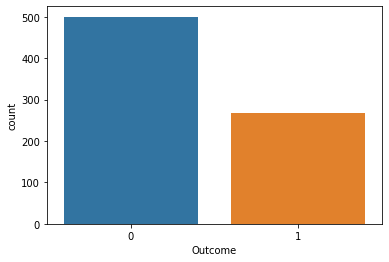

In [88]:
sns.countplot(x='Outcome', data=pima_df)

  <font color=darkblue>

# Distribution on Class Variable:

- Seeing the dataset is biased towards Non-Diabetics
- Among the 768 records - 500 persons having Non Diabetics and 168 has Diabetics

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

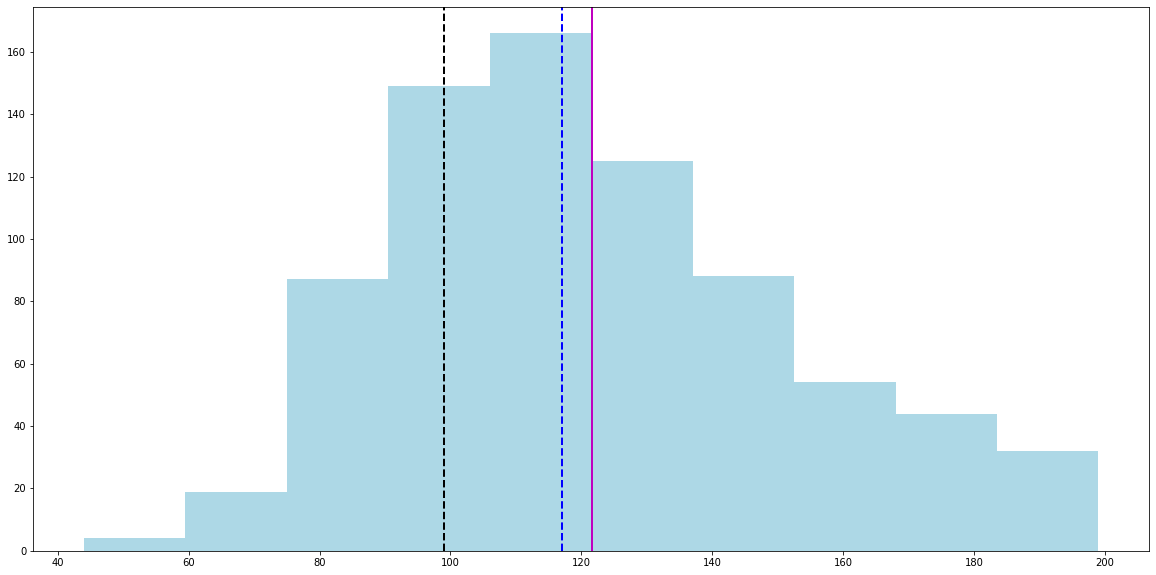

In [13]:
plt.figure(figsize=(20,10)) 
plt.hist(pima_df['Glucose'], color='lightblue',bins=10)
plt.axvline(pima_df['Glucose'].mean(), color='m', linewidth=2)
plt.axvline(pima_df['Glucose'].median(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(pima_df['Glucose'].mode()[0], color='black', linestyle='dashed', linewidth=2)

  <font color=darkblue>

# Distribution on Glucose:

- The above histogram on Glucose is not a normalized data. 
- Mean > Median which means Distribution of glucose is right skewed
- Distribution is multi modal

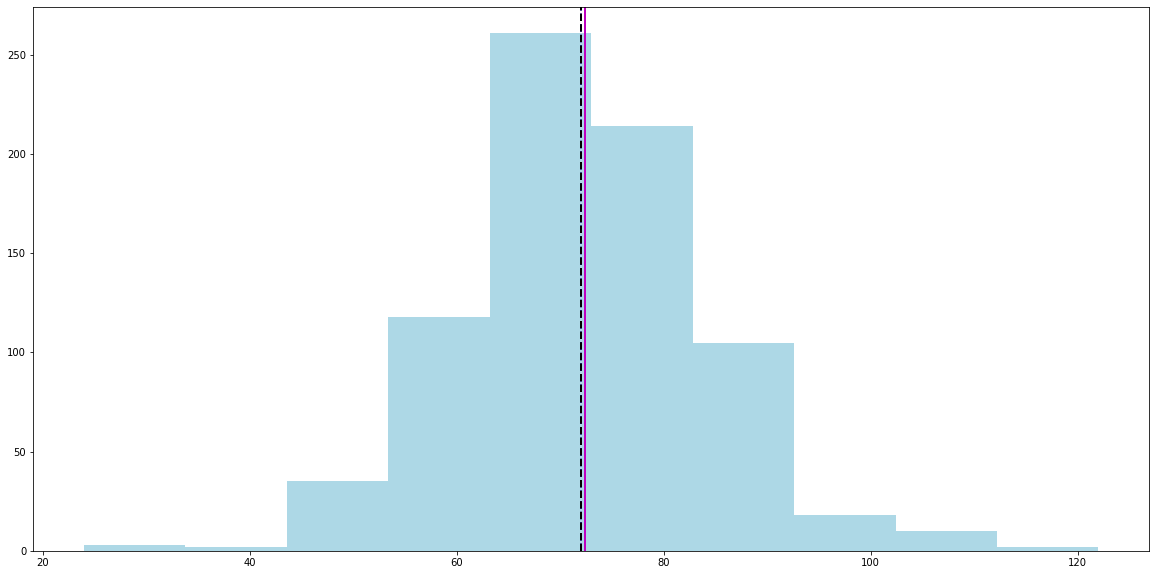

In [14]:
plt.figure(figsize=(20,10)) 
plt.hist(pima_df['BloodPressure'], color='lightblue',bins=10)
plt.axvline(pima_df['BloodPressure'].mean(), color='m', linewidth=2)
plt.axvline(pima_df['BloodPressure'].median(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(pima_df['BloodPressure'].mode()[0], color='black', linestyle='dashed', linewidth=2)

  <font color=darkblue>

# Distribution on BloodPressure:

- The above histogram on BP is not a normalized data. 
- Mean < Median which means Distribution of glucose is left skewed
- Distribution is multi modal

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


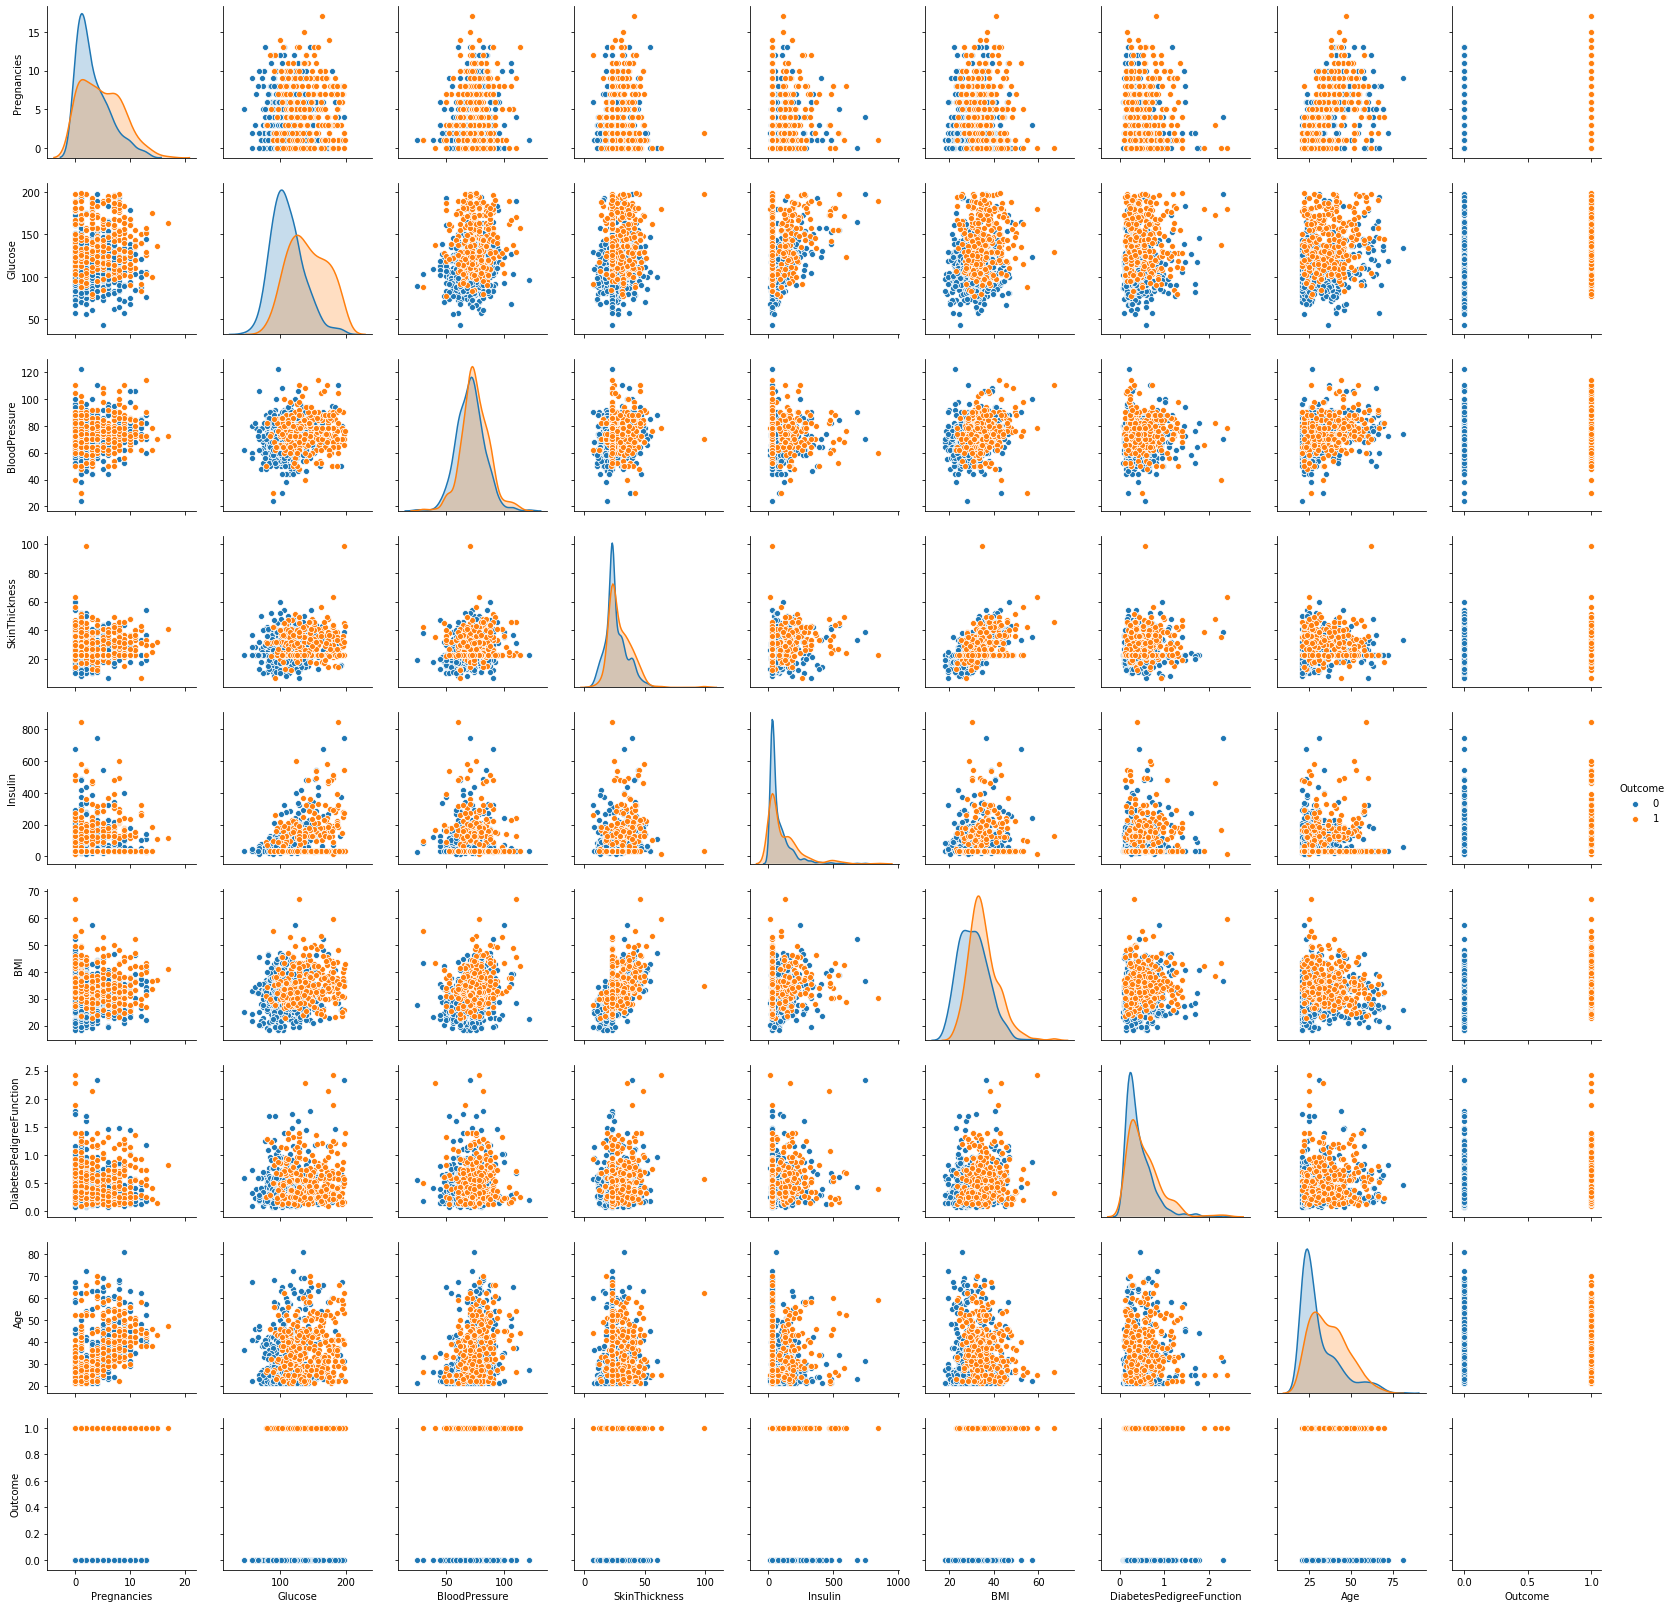

In [34]:
sns.pairplot(pima_df,diag_kind='kde',hue='Outcome')

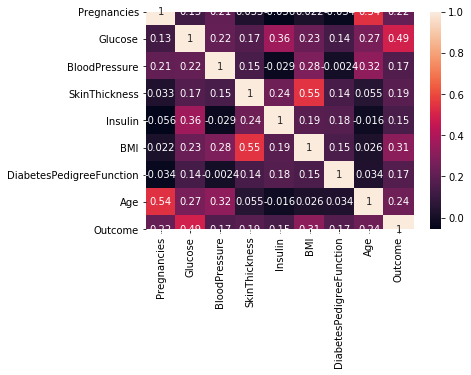

In [35]:
sns.heatmap(pima_df.corr(),annot=True)

  <font color=darkblue>

# Observation from PairPlot and HeatMap:

 - Distribution of Diabetic and Non Diabetic patients on the Gulcose attribute varies slightly, which means that  Gulcose tends to be the good predictor variable.
 - BMI and Skinthickness has the strong corelation, So that FAT/Thickend persons may have High BMI/Obesse and there is a high chance of Diabetics.
 - From Age and Pregnency, We can infer if the person is aged and high number of pregnancy, there is a high chance of Diabetics.

Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [89]:
# Copy all the predictor variables into X dataframe. Since 'Outcome' is dependent variable drop it
X = pima_df.drop('Outcome', axis=1)

# Copy the 'Outcome' column alone into the y dataframe. This is the dependent variable
y = pima_df[['Outcome']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

#Scaling
SC = StandardScaler()
SC.fit(X_train)
X_train_scaled = SC.transform(X_train)
X_test_scaled =  SC.transform(X_test)

# Show the results of the split
print("Training set has {} samples after Imputation.".format(X_train.shape[0]))
print("Testing set has {} samples after Imputation.".format(X_test.shape[0]))

Training set has 537 samples after Imputation.
Testing set has 231 samples after Imputation.


# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [90]:
# Model
model_DT=DecisionTreeClassifier(criterion='entropy',
                                splitter='best',
                                max_depth=5,
                                min_samples_split=2,
                                min_samples_leaf=1,
                                min_weight_fraction_leaf=0.0,
                                max_features=None,
                                random_state=1,
                                max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None,
                                class_weight=None,
                                presort='auto')

model_DT.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='auto',
                       random_state=1, splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [91]:
# Accuracy
DT_Train=model_DT.score(X_train_scaled, y_train)
DT_Test=model_DT.score(X_test_scaled, y_test)

# Output
print("Train Accuracy:",DT_Train)
print("Test Accuracy:",DT_Test)

Train Accuracy: 0.8286778398510242
Test Accuracy: 0.7748917748917749


In [92]:
print('---Training Confusion Matrix----')
print(confusion_matrix(y_train,model_DT.predict(X_train_scaled)))

print('---Testing Confusion Matrix----')
print(confusion_matrix(y_test,model_DT.predict(X_test_scaled)))

---Training Confusion Matrix----
[[315  39]
 [ 53 130]]
---Testing Confusion Matrix----
[[120  26]
 [ 26  59]]


  <font color=darkblue>

# Observation from DecisionTree Classifier:

- <b> Confusion Matrix for the Train Data Set </b>

| Total=537 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 315 | 39 | 354 |
| Actual 1   | 53 | 130| 183 |
| Col Total | 368 | 159 | 537|

   - Of the 183 Actual Diabetics Patients, the model correctly classified 130 patients as Diabetics
   - Of the 354 Actual Non-Diabetics, the model correctly classified 315 patients as Non-Diabetics
   - 39 Patients who are Non-Diabetics has been identified as Diabetics, which means Type- 1 error.
   - 53 Patients who are Diabetics but predicted as Non-Diabetics, Which is a Type-2 error.
   
- <b> Confusion Matrix for the Test Data Set </b>

| Total=231 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 120 | 26 | 146 |
| Actual 1   | 26 | 59| 85 |
| Col Total | 146 | 85 | 231|

   - Of the 85 Actual Diabetics Patients, the model correctly classified 59 patients as Diabetics
   - Of the 146 Actual Non-Diabetics, the model correctly classified 120 patients as Non-Diabetics
   - 26 Patients who are Non-Diabetics has been identified as Diabetics, which means Type- 1 error.
   - 26 Patients who are Diabetics but predicted as Non-Diabetics, Which is a Type-2 error.

# Q11 Print the feature importance of the decision model

In [93]:
feature_imp = pd.DataFrame({'Features' : pima_df.columns[0:8],
                            'Importance' : model_DT.feature_importances_})
feature_imp.sort_values(by='Importance', ascending=False)

,Features,Importance
1,Glucose,0.407712
5,BMI,0.222942
7,Age,0.151122
6,DiabetesPedigreeFunction,0.086339
0,Pregnancies,0.069966
2,BloodPressure,0.029867
3,SkinThickness,0.016333
4,Insulin,0.015719


  <font color=darkblue>

# Observation from Feature Importance:

- To predict the person as a Diabetics below feature scores more
     - Glucose
     - BMI
     - Age
     - DiabetesPedigreeFunction
     - Pregnancies
- Below Features has less importance on predicting a person as Diabetics/Non-Diabetics
    - BloodPressure
    - SkinThickness
    - Insulin

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [97]:
model_RF = RandomForestClassifier(n_estimators=100,
                                    criterion='entropy',
                                    max_depth=5,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_features='auto',
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None,
                                    bootstrap=True,
                                    oob_score=False,
                                    n_jobs=None,
                                    random_state=None,
                                    verbose=0,
                                    warm_start=False,
                                    class_weight=None)
model_RF.fit(X_train_scaled, y_train)

# Accuracy
pred_RF = model_RF.predict(X_test_scaled)
RF_Train = model_RF.score(X_train_scaled, y_train)
RF_Test = accuracy_score(y_test, pred_RF)

# Output
print("Train Accuracy:",RF_Train)
print("Test Accuracy:",RF_Test)

Train Accuracy: 0.845437616387337
Test Accuracy: 0.7878787878787878


In [98]:
print('---Training Confusion Matrix----')

print(confusion_matrix(y_train,model_RF.predict(X_train_scaled)))

print('---Testing Confusion Matrix----')

print(confusion_matrix(y_test,model_RF.predict(X_test_scaled)))

---Training Confusion Matrix----
[[330  24]
 [ 59 124]]
---Testing Confusion Matrix----
[[131  15]
 [ 34  51]]


  <font color=darkblue>

# Observation from Random Forest Classifier:

- <b> Confusion Matrix for the Train Data Set </b>

| Total=537 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 330 | 24 | 354 |
| Actual 1   | 59 | 124| 183 |
| Col Total | 393 | 144 | 537|

   - Of the 183 Actual Diabetics Patients, the model correctly classified 124 patients as Diabetics
   - Of the 354 Actual Non-Diabetics, the model correctly classified 330 patients as Non-Diabetics
   - 24 Patients who are Non-Diabetics has been identified as Diabetics, which means Type- 1 error.
   - 59 Patients who are Diabetics but predicted as Non-Diabetics, Which is a Type-2 error.
   
- <b> Confusion Matrix for the Test Data Set </b>

| Total=231 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 131 | 15 | 146 |
| Actual 1   | 34 | 51| 85 |
| Col Total | 165 | 66 | 231|

   - Of the 85 Actual Diabetics Patients, the model correctly classified 51 patients as Diabetics
   - Of the 146 Actual Non-Diabetics, the model correctly classified 131 patients as Non-Diabetics
   - 15 Patients who are Non-Diabetics has been identified as Diabetics, which means Type- 1 error.
   - 34 Patients who are Diabetics but predicted as Non-Diabetics, Which is a Type-2 error.
   - <b> Type-2 Error is more on compared to DecisionTree Classifier. </b>

In [70]:
rf_feature_imp = pd.DataFrame({'Features' : pima_df.columns[0:8],
                            'Importance' : model_RF.feature_importances_})
rf_feature_imp.sort_values(by='Importance', ascending=False)

,Features,Importance
1,Glucose,0.316308
5,BMI,0.204247
7,Age,0.136204
6,DiabetesPedigreeFunction,0.086980
0,Pregnancies,0.071255
4,Insulin,0.065534
3,SkinThickness,0.061453
2,BloodPressure,0.058020


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [99]:
model_AB = AdaBoostClassifier( base_estimator=None,
                            n_estimators=50,
                            learning_rate=1,
                            algorithm='SAMME.R',
                            random_state=None)
model_AB = model_AB.fit(X_train_scaled, y_train)

# Accuracy
AB_Train = model_AB.score(X_train_scaled, y_train)
pred_AB =model_AB.predict(X_test_scaled)
AB_Test = accuracy_score(y_test, pred_AB)

print("Train Accuracy:",AB_Train)
print("Test Accuracy:",AB_Test)

Train Accuracy: 0.8268156424581006
Test Accuracy: 0.7835497835497836


In [100]:
print('---Training Confusion Matrix----')

print(confusion_matrix(y_train,model_AB.predict(X_train_scaled)))

print('---Testing Confusion Matrix----')

print(confusion_matrix(y_test,model_AB.predict(X_test_scaled)))

---Training Confusion Matrix----
[[316  38]
 [ 55 128]]
---Testing Confusion Matrix----
[[127  19]
 [ 31  54]]


<font color=darkblue>

# Observation from AdaBoost Classifier:

- <b> Confusion Matrix for the Train Data Set </b>

| Total=537 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 316 | 38 | 354 |
| Actual 1   | 55 | 128| 183 |
| Col Total | 371 | 166 | 537|

   - Of the 183 Actual Diabetics Patients, the model correctly classified 128 patients as Diabetics
   - Of the 354 Actual Non-Diabetics, the model correctly classified 316 patients as Non-Diabetics
   - 38 Patients who are Non-Diabetics has been identified as Diabetics, which means Type- 1 error.
   - 55 Patients who are Diabetics but predicted as Non-Diabetics, Which is a Type-2 error.
   
- <b> Confusion Matrix for the Test Data Set </b>

| Total=231 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 127 | 19 | 146 |
| Actual 1   | 31 | 54| 85 |
| Col Total | 159 | 72 | 231|

   - Of the 85 Actual Diabetics Patients, the model correctly classified 54 patients as Diabetics
   - Of the 146 Actual Non-Diabetics, the model correctly classified 127 patients as Non-Diabetics
   - 19 Patients who are Non-Diabetics has been identified as Diabetics, which means Type- 1 error.
   - 31 Patients who are Diabetics but predicted as Non-Diabetics, Which is a Type-2 error.
   - <b> Type-2 Error is minimal than Random Forest Classifier. </b>

In [51]:
AB_feature_imp = pd.DataFrame({'Features' : pima_df.columns[0:8],
                            'Importance' : model_AB.feature_importances_})
AB_feature_imp.sort_values(by='Importance', ascending=False)

,Features,Importance
1,Glucose,0.22
6,DiabetesPedigreeFunction,0.20
5,BMI,0.18
3,SkinThickness,0.10
4,Insulin,0.10
2,BloodPressure,0.08
7,Age,0.08
0,Pregnancies,0.04


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [74]:
model_BG = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform', metric='euclidean'),
                        n_estimators=10,
                        max_samples=1.0,
                        max_features=1.0,
                        bootstrap=True,
                        bootstrap_features=False,
                        oob_score=False,
                        warm_start=False,
                        n_jobs=None,
                        random_state=10,
                        verbose=0)


model_BG = model_BG.fit(X_train_scaled, y_train)

# Accuracy
pred_BG =model_BG.predict(X_test_scaled)
BG_Test = accuracy_score(y_test, pred_BG)

BG_Train = model_BG.score(X_train_scaled, y_train)

pred_BG =model_BG.predict(X)
pred_BG

print("Training Accuracy:",BG_Train)
print("Testing Accuracy:",BG_Test)

Training Accuracy: 0.813780260707635
Testing Accuracy: 0.7662337662337663


In [64]:
print('---Training Confusion Matrix----')

print(confusion_matrix(y_train,model_BG.predict(X_train_scaled)))

print('---Testing Confusion Matrix----')

print(confusion_matrix(y_test,model_BG.predict(X_test_scaled)))

---Training Confusion Matrix----
[[323  31]
 [ 69 114]]
---Testing Confusion Matrix----
[[130  16]
 [ 38  47]]


<font color=darkblue>

# Observation from Bagging Classifier:

- <b> Confusion Matrix for the Train Data Set </b>

| Total=537 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 323 | 31 | 354 |
| Actual 1   | 69 | 114| 183 |
| Col Total | 393 | 145 | 537|

   - Of the 183 Actual Diabetics Patients, the model correctly classified 114 patients as Diabetics
   - Of the 354 Actual Non-Diabetics, the model correctly classified 323 patients as Non-Diabetics
   - 31 Patients who are Non-Diabetics has been identified as Diabetics, which means Type- 1 error.
   - 69 Patients who are Diabetics but predicted as Non-Diabetics, Which is a Type-2 error.
   
- <b> Confusion Matrix for the Test Data Set </b>

| Total=231 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 130 | 16 | 146 |
| Actual 1   | 38 | 47| 85 |
| Col Total | 168 | 63 | 231|

   - Of the 85 Actual Diabetics Patients, the model correctly classified 47 patients as Diabetics
   - Of the 146 Actual Non-Diabetics, the model correctly classified 130 patients as Non-Diabetics
   - 16 Patients who are Non-Diabetics has been identified as Diabetics, which means Type- 1 error.
   - 38 Patients who are Diabetics but predicted as Non-Diabetics, Which is a Type-2 error.

# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [77]:
model_GB = GradientBoostingClassifier(
                                    learning_rate=0.02,
                                    n_estimators=100,
                                    subsample=1.0,
                                    criterion='friedman_mse',
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_depth=3,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None,
                                    random_state=7)
model_GB = model_GB.fit(X_train_scaled, y_train)

# Accuracy
GB_Train = model_GB.score(X_train_scaled, y_train)
pred_GB =model_GB.predict(X_test_scaled)
GB_Test = accuracy_score(y_test, pred_GB)

print("Training Accuracy:",GB_Train)
print("Testing Accuracy:",GB_Test)

Training Accuracy: 0.8305400372439479
Testing Accuracy: 0.7705627705627706


In [53]:
print('---Training Confusion Matrix----')

print(confusion_matrix(y_train,model_GB.predict(X_train_scaled)))

print('---Testing Confusion Matrix----')

print(confusion_matrix(y_test,model_GB.predict(X_test_scaled)))

---Training Confusion Matrix----
[[330  24]
 [ 67 116]]
---Testing Confusion Matrix----
[[123  23]
 [ 30  55]]


<font color=darkblue>

# Observation from GradientBoosting Classifier:

- <b> Confusion Matrix for the Train Data Set </b>

| Total=537 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 330 | 24 | 354 |
| Actual 1   | 67 | 116| 183 |
| Col Total | 397 | 140 | 537|

   - Of the 183 Actual Diabetics Patients, the model correctly classified 116 patients as Diabetics
   - Of the 354 Actual Non-Diabetics, the model correctly classified 330 patients as Non-Diabetics
   - 24 Patients who are Non-Diabetics has been identified as Diabetics, which means Type- 1 error.
   - 67 Patients who are Diabetics but predicted as Non-Diabetics, Which is a Type-2 error.
   
- <b> Confusion Matrix for the Test Data Set </b>

| Total=231 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 123 | 23 | 146 |
| Actual 1   | 30 | 55| 85 |
| Col Total | 153 | 78 | 231|

   - Of the 85 Actual Diabetics Patients, the model correctly classified 55 patients as Diabetics
   - Of the 146 Actual Non-Diabetics, the model correctly classified 123 patients as Non-Diabetics
   - 23 Patients who are Non-Diabetics has been identified as Diabetics, which means Type- 1 error.
   - 30 Patients who are Diabetics but predicted as Non-Diabetics, Which is a Type-2 error.

In [54]:
GB_feature_imp = pd.DataFrame({'Features' : pima_df.columns[0:8],
                            'Importance' : model_GB.feature_importances_})
GB_feature_imp.sort_values(by='Importance', ascending=False)

,Features,Importance
1,Glucose,0.479392
5,BMI,0.257460
7,Age,0.128056
6,DiabetesPedigreeFunction,0.067303
0,Pregnancies,0.032133
4,Insulin,0.018796
3,SkinThickness,0.009852
2,BloodPressure,0.007009


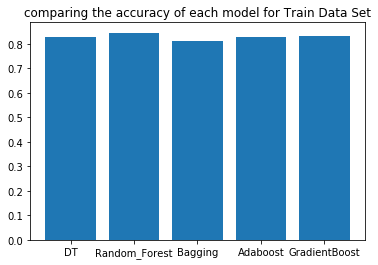

In [101]:
Accuracy = [DT_Train, RF_Train, BG_Train,AB_Train,GB_Train]
Methods = ['DT', 'Random_Forest', 'Bagging','Adaboost','GradientBoost']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('comparing the accuracy of each model for Train Data Set')
plt.show()

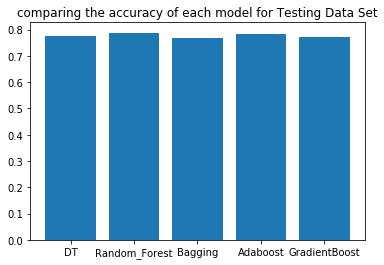

In [102]:
Accuracy = [DT_Test, RF_Test, BG_Test,AB_Test,GB_Test]
Methods = ['DT', 'Random_Forest', 'Bagging','Adaboost','GradientBoost']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('comparing the accuracy of each model for Testing Data Set')
plt.show()

- Random Forest Performs well over all the other models.

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [175]:
vc = VotingClassifier(estimators=[
       ('Decision_Tree', model_DT), ('RF', model_RF), ('AdaBoost', model_AB),
       ('GradientBoost', model_GB),('Bagging',model_BG)], voting='hard')
vc = vc.fit(X_train_scaled, y_train)
                            
# Accuracy
vc_Train = model_GB.score(X_train_scaled, y_train)
pred_vc =vc.predict(X_test_scaled)
vc_Test = accuracy_score(y_test, pred_vc)

print("Training Accuracy:",vc_Train)
print("Testing Accuracy:",vc_Test)

Training Accuracy: 0.8305400372439479
Testing Accuracy: 0.7835497835497836


In [179]:
print('---Training Confusion Matrix----')

print(confusion_matrix(y_train,vc.predict(X_train_scaled)))

print('---Testing Confusion Matrix----')

print(confusion_matrix(y_test,vc.predict(X_test_scaled)))

---Training Confusion Matrix----
[[332  22]
 [ 63 120]]
---Testing Confusion Matrix----
[[129  17]
 [ 33  52]]


<font color=darkblue>

# Observation from Voting Classifier:

- <b> Confusion Matrix for the Train Data Set </b>

| Total=537 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 332 | 22 | 354 |
| Actual 1   | 63 | 120| 183 |
| Col Total | 395 | 142 | 537|

   - Of the 183 Actual Diabetics Patients, the model correctly classified 120 patients as Diabetics
   - Of the 354 Actual Non-Diabetics, the model correctly classified 332 patients as Non-Diabetics
   - 22 Patients who are Non-Diabetics has been identified as Diabetics, which means Type- 1 error.
   - 63 Patients who are Diabetics but predicted as Non-Diabetics, Which is a Type-2 error.
   
- <b> Confusion Matrix for the Test Data Set </b>

| Total=231 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 129 | 17 | 146 |
| Actual 1   | 33 | 52| 85 |
| Col Total | 162 | 69 | 231|

   - Of the 85 Actual Diabetics Patients, the model correctly classified 52 patients as Diabetics
   - Of the 146 Actual Non-Diabetics, the model correctly classified 129 patients as Non-Diabetics
   - 17 Patients who are Non-Diabetics has been identified as Diabetics, which means Type- 1 error.
   - 33 Patients who are Diabetics but predicted as Non-Diabetics, Which is a Type-2 error.